In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

In [2]:
def plot_Y(ax, el, m):
    Y = sph_harm(abs(m), el, phi, theta)
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('plasma', 7))  #'RdYlBu_r''PRGn'
    cmap.set_clim(-0.5, 0.5)
    ax.plot_surface(Yx, Yy, Yz,facecolors=cmap.to_rgba(Y.real),rstride=2, cstride=2)
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    ax.set_title(r'$ Y_{{{},{}}}$'.format(el, m),fontsize=20)
    ax_lim = 0.5
    ax.set_figsize=(16,16)
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

In [3]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Spherical Harmonics
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

$ \begin{equation*}m = \left\{\begin{array}{rl} -l,\\ l\end{array}\right.\end{equation*} $

$ l = 0,1,2,3$

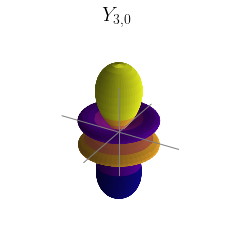

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.show()

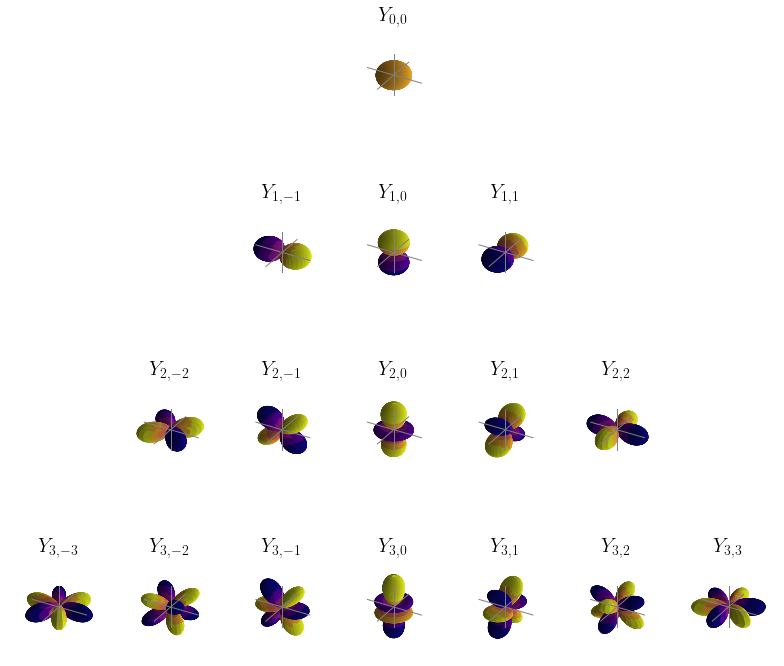

In [5]:
el_max = 3
fig = plt.figure(figsize=(11,10))
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
fig.tight_layout()
plt.show()

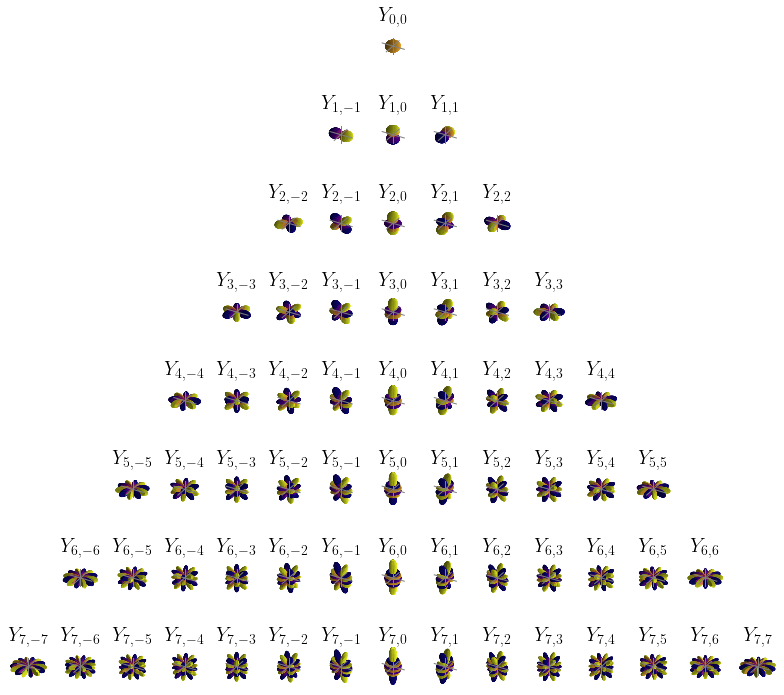

In [6]:
el_max = 7
fig = plt.figure(figsize=(11,10))
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
fig.tight_layout()
plt.show()